<a href="https://colab.research.google.com/github/arifuddinatif/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# accessing the data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/Supervised ML - Classification/dat files/Coronavirus Tweets.csv',encoding='latin-1')

#Performing EDA on the data

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,menyrbi philgahan chrisitv,0,3
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,1,3
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,1,3
3,3802,48754,NaN,2020-03-16,food stock one empti pleas dont panic enough f...,1,3
4,3803,48755,NaN,2020-03-16,readi go supermarket covid19 outbreak im paran...,-1,3


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,airlin pilot offer stock supermarket shelv nz ...,0,4
41153,44952,89904,NaN,2020-04-14,respons complaint provid cite covid19 relat de...,-1,4
41154,44953,89905,NaN,2020-04-14,know itâ get tough kameronwild ration toilet ...,1,4
41155,44954,89906,NaN,2020-04-14,wrong smell hand sanit start turn coronavirus ...,0,4
41156,44955,89907,i love you so much || he/him,2020-04-14,tartiicat well newus rift go 70000 amazon rn a...,-1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   TweetMonth     41157 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.2+ MB


##looking for null values

In [ ]:
count = df.isnull().sum().sort_values()

In [ ]:
value = df.isnull().sum()/len(df)*100

In [ ]:
percentage = value.sort_values()

In [ ]:
null_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])

In [ ]:
null_data

,Count,Percentage
UserName,0,0.000000
ScreenName,0,0.000000
TweetAt,0,0.000000
OriginalTweet,0,0.000000
Sentiment,0,0.000000
TweetMonth,0,0.000000
Location,8590,20.871298


##cleaning 'OriginalTweet' column

In [ ]:
# code to remove unimportant text from the data

list_of_tweets = []
b = []
c = []
for i in range(len(df['OriginalTweet'])):
  a = df['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l)  


In [ ]:
list_of_tweets

In [ ]:
# assigning 'OriginalTweet' column to the above list

df['OriginalTweet'] = list_of_tweets

In [ ]:
# downloading stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# processing the text 

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : text_process(x))

##cleaning 'Sentiment' column

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
# changing the values in the data accordingly

for i in range(len(df['Sentiment'])):
  if df['Sentiment'][i] == 'Extremely Negative':
    df['Sentiment'][i] = 'Negative'
  elif df['Sentiment'][i] == 'Extremely Positive':
    df['Sentiment'][i] = 'Positive'

In [ ]:
# providing necessary class values

''' for negative values = -1
        Positive values = 1   
        neutral values = 0 '''

for i in range(len(df['Sentiment'])):
  if df['Sentiment'][i] == 'Negative':
    df['Sentiment'][i] = -1
  elif df['Sentiment'][i] == 'Positive':
    df['Sentiment'][i] = 1
  elif df['Sentiment'][i] == 'Neutral': 
    df['Sentiment'][i] = 0

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
# applying stemming the function

df['OriginalTweet'] = df['OriginalTweet'].apply(stemming)

#cleaning TweetAt column

In [ ]:
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [ ]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y') 

In [ ]:
# applying the above function to 'TweetAt' column

df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)

In [ ]:
type(df['TweetAt'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['TweetAt'][20].year

2020

In [ ]:
# getting the month number from 'TweetAt' column

df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

# getting information and drawing conclusions through plots

Text(0.5, 1.0, 'Tweets distributions')

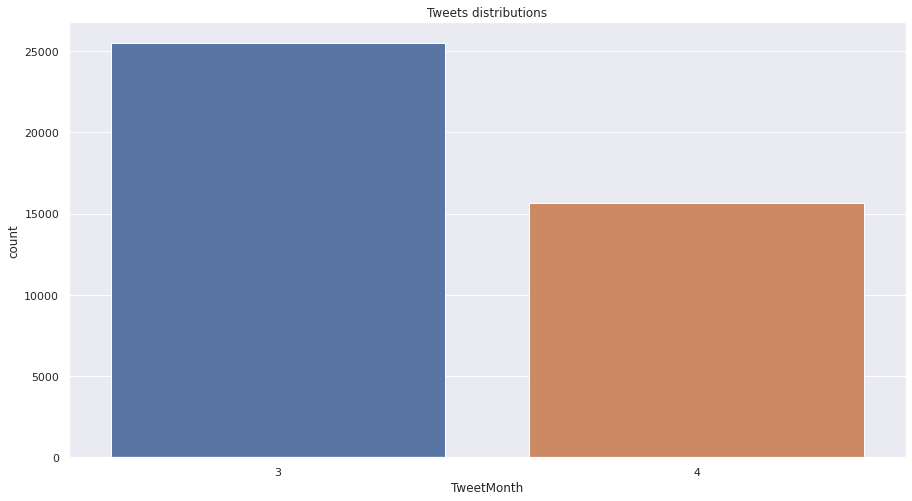

In [ ]:
# getting count of months 3 and 4 

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Tweets distributions')



*   from above we can say that the tweets are more in the month of march.




In [ ]:
df['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

In [ ]:
# getting differant dates from the unique months

list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day)  


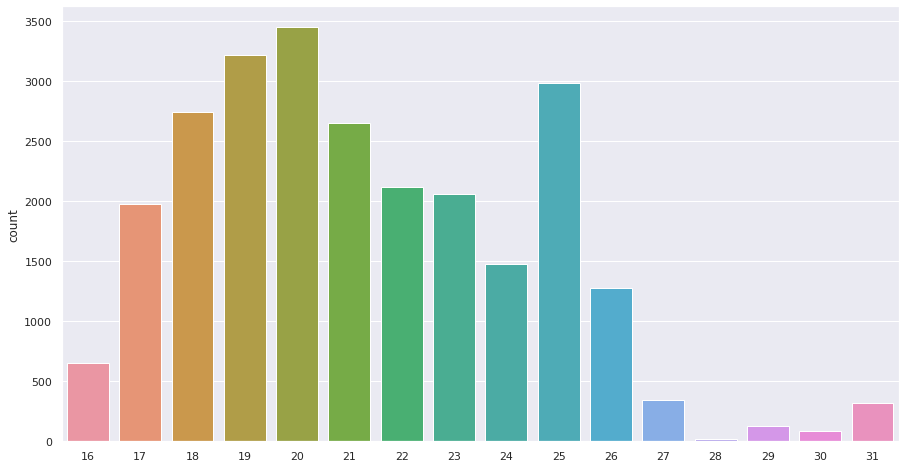

In [ ]:
# plotting the frequency of the tweets from month 3 (march)

sns.countplot(x=list_of_month_3)




*   from above we can say that the tweets were maximum on the dates - 20 and 25 of the month march.






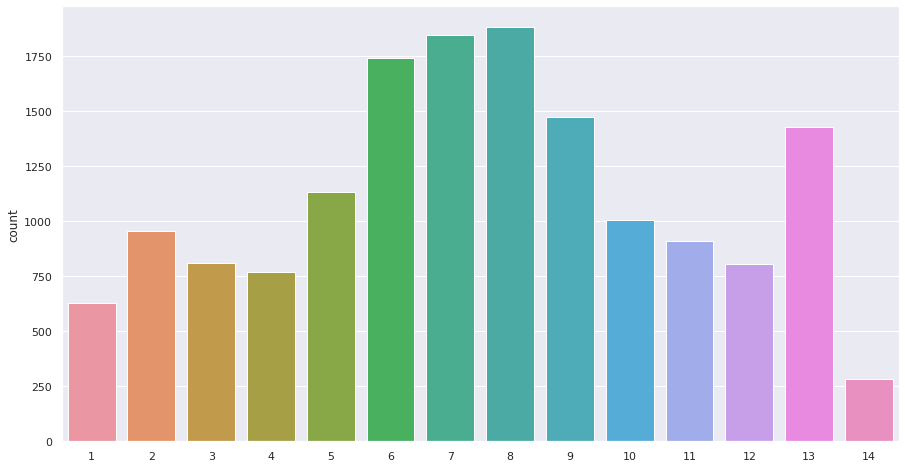

In [ ]:
# plotting the frequency of the tweets from month 4 (april)

sns.countplot(x=list_of_month_4)

*   from above we can say that the tweets were maximum on the dates - 7 and 8 of the month april.

Text(0.5, 1.0, 'Sentiment distributions')

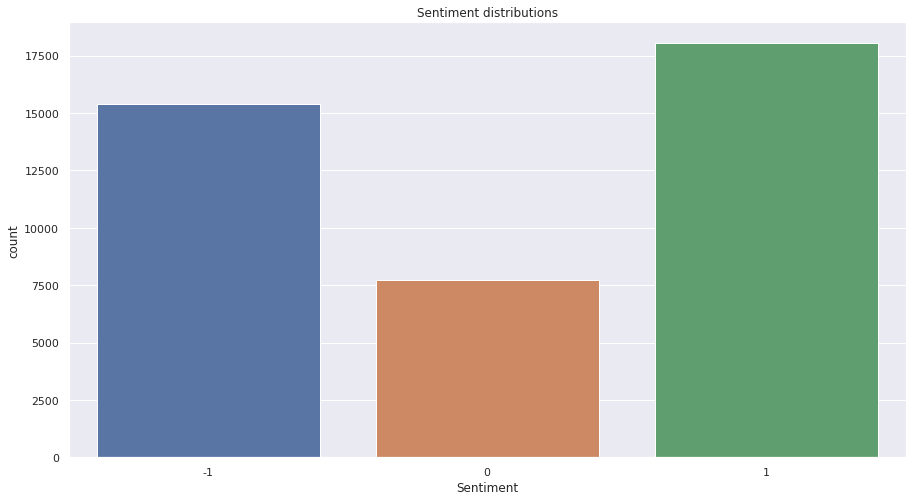

In [ ]:
# getting count of differant sentiments i.e positive,negative,neutral

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

*   from above we can say that there are more number of positive sentiment tweets than neutral and negative tweets.

In [ ]:
# creating a dataframe which contains the count of tweets of a particular location

df_2 = df.groupby('Location')['Sentiment'].count().reset_index()

In [ ]:
df_2.sort_values(by='Sentiment',ascending=False,inplace=True)

In [ ]:
df_2.reset_index(inplace=True)

In [ ]:
df_2.drop(columns='index',inplace=True)

In [ ]:
# top 10 countries with most tweets

top_10_locations = df_2.head(10)


In [ ]:
top_10_locations

,Location,Sentiment
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


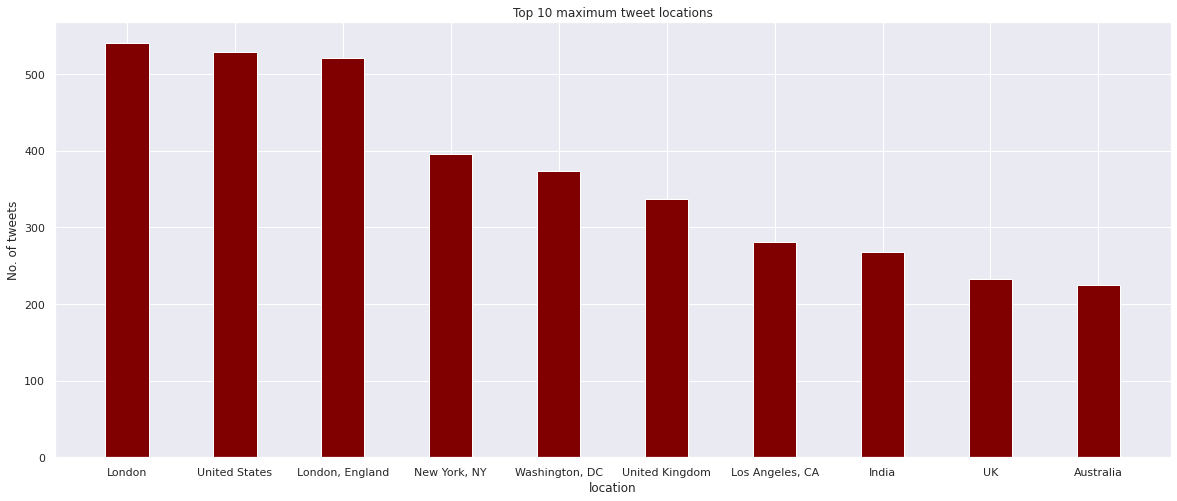

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
plt.bar(top_10_locations['Location'], top_10_locations['Sentiment'], color ='maroon',
        width = 0.4)
 
plt.xlabel("location")
plt.ylabel("No. of tweets")
plt.title("Top 10 maximum tweet locations")
plt.show()

#training model

In [ ]:
# vectorizing the data from 'OriginalTweet' column

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(df['OriginalTweet'])

# assigning dependent and independent variables

X = X.toarray() 
y = df['Sentiment']
y=y.astype('int')

In [ ]:

# neg_matrix = cvector.transform(df[df.Sentiment == 'Negative'].OriginalTweet)
# ext_neg_matrix = cvector.transform(df[df.Sentiment == 'Extremely Negative'].OriginalTweet)
# neu_matrix = cvector.transform(df[df.Sentiment == 'Neutral'].OriginalTweet)
# ext_pos_matrix = cvector.transform(df[df.Sentiment == 'Extremely Positive'].OriginalTweet)
# pos_matrix = cvector.transform(df[df.Sentiment == 'Positve'].OriginalTweet)

In [ ]:
# splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (32925, 5121)
x_test shape:  (8232, 5121)
y_train shape:  (32925,)
y_test shape:  (8232,)


In [ ]:
# applying logistic regression model

model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# getting appropriate predictions on train and test sets

prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

## evaluating metrics of the model

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,f1_score,confusion_matrix

[[10959   519   837]
 [  426  5011   412]
 [  914   624 13223]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

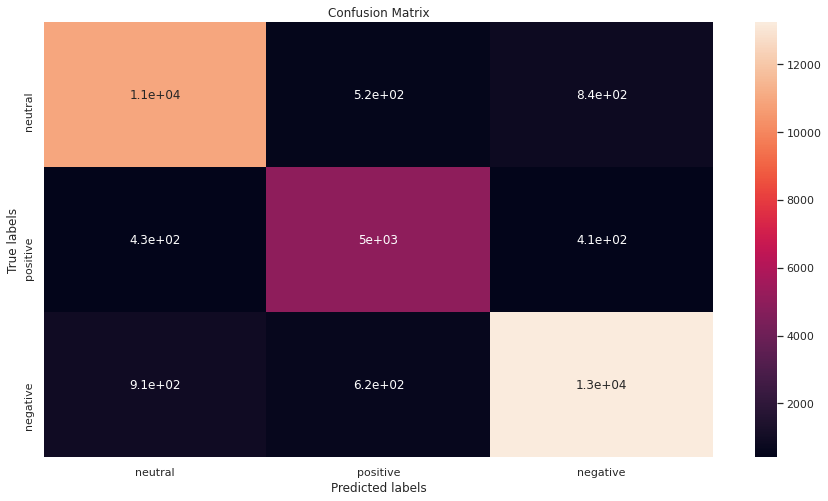

In [ ]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2523  229  374]
 [ 222 1075  185]
 [ 354  255 3015]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

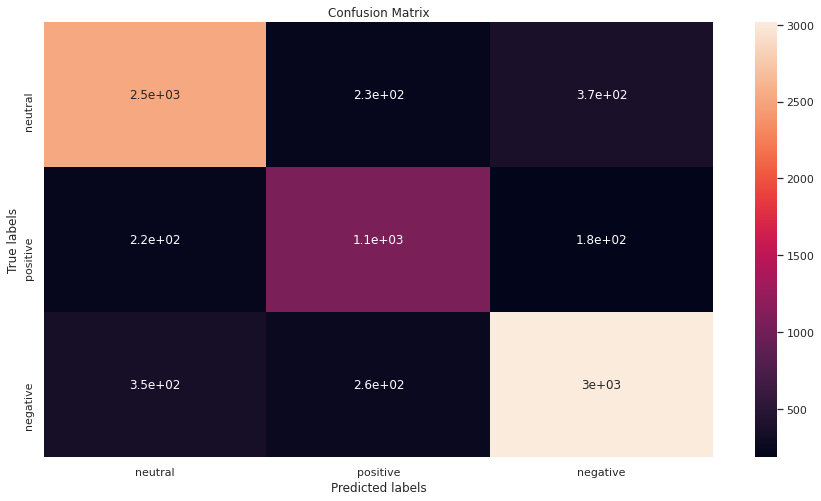

In [ ]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# getting differant scores of train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precision of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))
print('F1-score of train set: ',f1_score(prediction_train, y_train, average='weighted'))

Accuracy score of train set:  0.8866514806378132
Precision of train set:  0.8875615266256266
Recall of train set:  0.8866514806378132
F1-score of train set:  0.8869708854574941


In [ ]:
# getting differant scores of test set

print('Accuracy score of test set: ',accuracy_score(prediction_test,y_test))
print('Precision of test set: ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(prediction_test,y_test, average = 'weighted'))
print('F1-score of test set: ',f1_score(prediction_test, y_test, average='weighted'))

Accuracy score of test set:  0.8033284742468416
Precision of test set:  0.8046727775737095
Recall of test set:  0.8033284742468416
F1-score of test set:  0.8038953821105832


In [ ]:
# getting classification report for train and test sets

print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,prediction_test))

Train set report


              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     12299
           0       0.86      0.81      0.83      6154
           1       0.90      0.91      0.90     14472

    accuracy                           0.89     32925
   macro avg       0.88      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



Test set report


              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3099
           0       0.73      0.69      0.71      1559
           1       0.83      0.84      0.84      3574

    accuracy                           0.80      8232
   macro avg       0.79      0.78      0.79      8232
weighted avg       0.80      0.80      0.80      8232

